In [1]:
using DataFrames, DataFramesMeta, JSON, Statistics
using StatsPlots
gr()

Plots.GRBackend()

In [2]:
data = []
for fname in readdir()
    name, ext = splitext(fname)
    if ext == ".json"
        fields = split(fname, '_')
        if fields[1] == "constant"
            j = JSON.parsefile(fname; dicttype=Dict, inttype=Int64)
            push!(data, (fields, j, name))
        end
    end
end

In [3]:
df = DataFrame(
    name = String[],
    arrival_rate = Int[],
    vehicles = Int[],
    time_windows = Int[],
    locations = Int[],
    policy = String[],
    day = Int[],
    packages = Int[],
    avg_days_taken = Float64[],
    total_distance = Int[],
    total_time = Int[],
    deliveries = Int[],
    attempted_deliveries = Int[]
)
for v in data
    for record in v[2]
        push!(df, (
            v[3],
            parse(Int, v[1][2]),
            parse(Int, v[1][3]),
            parse(Int, v[1][4]),
            parse(Int, v[1][5]),
            v[1][6],
            record["day"],
            record["number_of_packages"],
            mean(record["delivered_packages"]["days_taken"]),
            sum(record["distances"]),
            sum(record["times"]),
            length(record["delivered_packages"]["days_taken"]),
            sum(record["deliveries_attempted"]),
        ))
    end
end

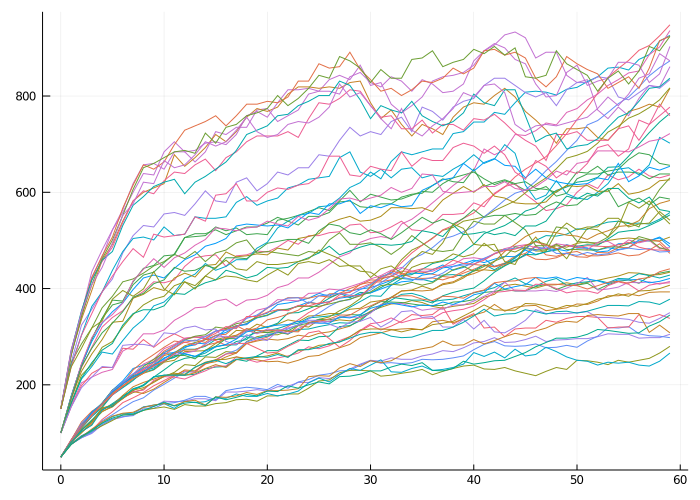

In [10]:
gr(size=(700,500))
@df df plot(
    :day, :packages, group = :name, legend = nothing
)

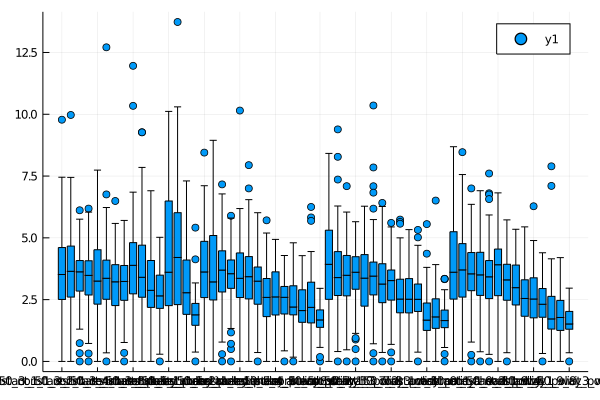

In [8]:
@df df boxplot(
    :name, :avg_days_taken
)

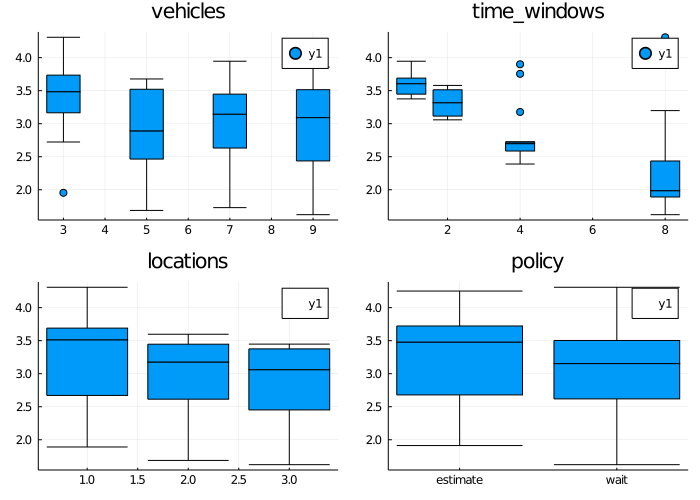

In [11]:
q = @linq df |>
    by([:vehicles, :time_windows, :locations, :policy], y = mean(:avg_days_taken))
a = @df q boxplot(:vehicles, :y, title="vehicles")
b = @df q boxplot(:time_windows, :y, title="time_windows")
c = @df q boxplot(:locations, :y, title="locations")
d = @df q boxplot(:policy, :y, title="policy")
plot(a,b,c,d)